In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
# loading the dataset
housing =fetch_california_housing()

#converting data into dataframe
california_df= pd.DataFrame(data=housing.data, columns=housing.feature_names)
california_df["target"]= housing.target

#spliting the data into features and target

x=california_df.drop("target", axis=1)
y=california_df["target"]

#split trian and testing the set
# 80% data will be trained and 20% data will be tested
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

#standarding the features
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

#fit the SGDRegressor model
sgd_reg= SGDRegressor(max_iter=1000, tol=1e-3,random_state=42)
sgd_reg.fit(x_train_scaled, y_train)


SGDRegressor(random_state=42)

In [5]:
#making predections

predictions= sgd_reg.predict(x_test_scaled)

#evaluate the model's performance using out mean squared error matrics
mse= mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.550598777585777


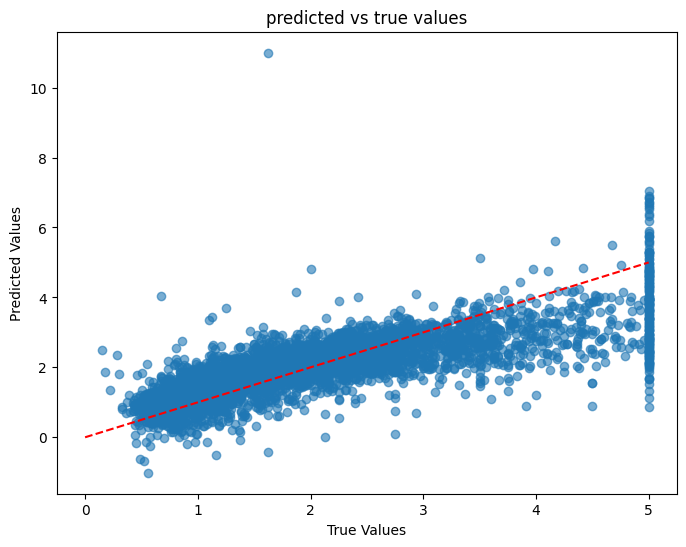

In [7]:
#visualizing the predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([0,5],[0,5],color="red", linestyle='--')
plt.title("predicted vs true values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

